## The best 1000 movies dataset and its info

This Dataset stores information about the 1000 best rated movies at imdb.com.

The data is classified as it follows: 

- Poster_Link: poster from the movie.
- Series_Title: title from the movie.
- Released_Year: year at which the movie was released.
- Certificate: a label stating who should be allowed to watch the movie.
- Runtime: duration of the movie.
- Genre: the different genres of the movie stored in the same column.
- IMDB_Rating: movie rating from IMDB.com.
- Overview: movie theme description.
- Meta_score: weighted average of reviews from metacritic.com
- Director: movie director.
- Star1, Star2, Star3 and Star4: main cast of the movie separated in different columns.
- No_of_Votes: sum of votes rating the movie.
- Gross: cumulative earnings of the movie in US and Canada.

## Importing libraries, functions and reading data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

In [2]:
# read dataset 
movies = pd.read_csv("https://raw.githubusercontent.com/JuanArchidona/practica_pandas/main/imdb_top_1000.csv", sep = ",")

In [3]:
movies.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


# Cleaning Data

Let's start with a brief look at the size and information of the dataset.

In [4]:
movies.shape

(1000, 16)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


We are only going to deal with the columns that provide relevant information for our analysis. Columns with unhelpful data will be removed later.

Next we are going to abbreviate the name of some columns.

In [6]:
movies = movies.rename(columns = {"Series_Title": "Title", "Released_Year": "Year", "IMDB_Rating": "Rating", "Meta_score": "Meta_Score", "No_of_Votes": "Votes"})

Let's check out the values of "Year".

In [7]:
movies["Year"].sort_values(ascending = False).unique()

array(['PG', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990',
       '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982',
       '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974',
       '1973', '1972', '1971', '1970', '1969', '1968', '1967', '1966',
       '1965', '1964', '1963', '1962', '1961', '1960', '1959', '1958',
       '1957', '1956', '1955', '1954', '1953', '1952', '1951', '1950',
       '1949', '1948', '1947', '1946', '1945', '1944', '1943', '1942',
       '1941', '1940', '1939', '1938', '1937', '1936', '1935', '1934',
       '1933', '1932', '1931', '1930', '1928', '1927', '1926', '1925',
       '1924', '1922', '1921', '1920'], dtype=object)

In [8]:
movies.query("Year == 'PG'", engine = "python")["Title"]

966    Apollo 13
Name: Title, dtype: object

The release year of the movie "Apollo 13" is incorrect. We change it to its real value: "1995".

In [9]:
movies["Year"] = movies["Year"].replace(["PG"], "1995")

 We need to modify the type of all "Year" values.

In [10]:
movies = movies.assign(Year = lambda dataset: dataset.Year.astype(int))

We also need to modify the values of "Meta_Score" for later comparisons.

In [11]:
movies = movies.assign(Meta_Score = lambda dataset: dataset.Meta_Score.replace(np.nan, 0).astype(int))

Next we are going to limit the column "Genre", in which we will store just the main genre of each movie.

In [12]:
movies = movies.assign(Genre = lambda dataset: dataset.Genre.apply(lambda text: text.split(",")[0]))

We also need to adjust "Gross" values and type, replacing empty values.

In [13]:
movies = movies.assign(Gross = lambda dataset: dataset.Gross.str.replace(",", "").astype("float64").replace(np.nan, 0).astype(int))

Marvel Studios began releasing its own movies in 2008 with "Iron Man". 

In [14]:
movies.query("Title == 'Iron Man'", engine = "python")["Year"]

502    2008
Name: Year, dtype: int64

Let's create another column called "Marvel". With which we are going to classify all the movies, depending on whether they were released before or since "Marvel" began releasing its own movies.

In [15]:
movies = movies.assign(Marvel = lambda dataset: dataset.Year.map(lambda value: "Before" if value < 2008 else "Since"))

Finally we are going to drop some columns that do not provide relevant information to our analysis.

In [16]:
movies = movies.drop(columns = {"Poster_Link", "Certificate", "Runtime", "Overview", "Star1", "Star2", "Star3", "Star4"}) 

Let's check the final format of the dataset, parameters and their values.

In [17]:
movies.head()

,Title,Year,Genre,Rating,Meta_Score,Director,Votes,Gross,Marvel
0,The Shawshank Redemption,1994,Drama,9.3,80,Frank Darabont,2343110,28341469,Before
1,The Godfather,1972,Crime,9.2,100,Francis Ford Coppola,1620367,134966411,Before
2,The Dark Knight,2008,Action,9.0,84,Christopher Nolan,2303232,534858444,Since
3,The Godfather: Part II,1974,Crime,9.0,90,Francis Ford Coppola,1129952,57300000,Before
4,12 Angry Men,1957,Crime,9.0,96,Sidney Lumet,689845,4360000,Before


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1000 non-null   object 
 1   Year        1000 non-null   int64  
 2   Genre       1000 non-null   object 
 3   Rating      1000 non-null   float64
 4   Meta_Score  1000 non-null   int64  
 5   Director    1000 non-null   object 
 6   Votes       1000 non-null   int64  
 7   Gross       1000 non-null   int64  
 8   Marvel      1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


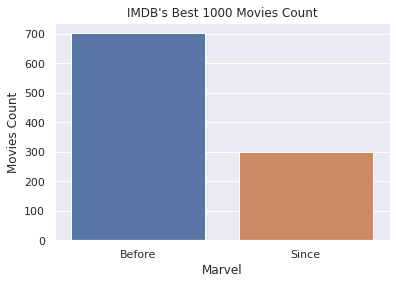

In [19]:
sns.countplot(x = "Marvel", data = movies)
plt.title("IMDB's Best 1000 Movies Count")
plt.ylabel("Movies Count")
plt.xlabel("Marvel")
plt.show();

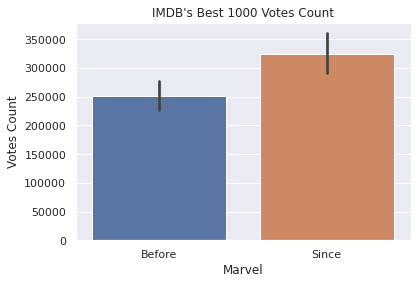

In [20]:
sns.barplot(x = "Marvel", y = "Votes", data = movies)
plt.title("IMDB's Best 1000 Votes Count")
plt.ylabel("Votes Count")
plt.xlabel("Marvel")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


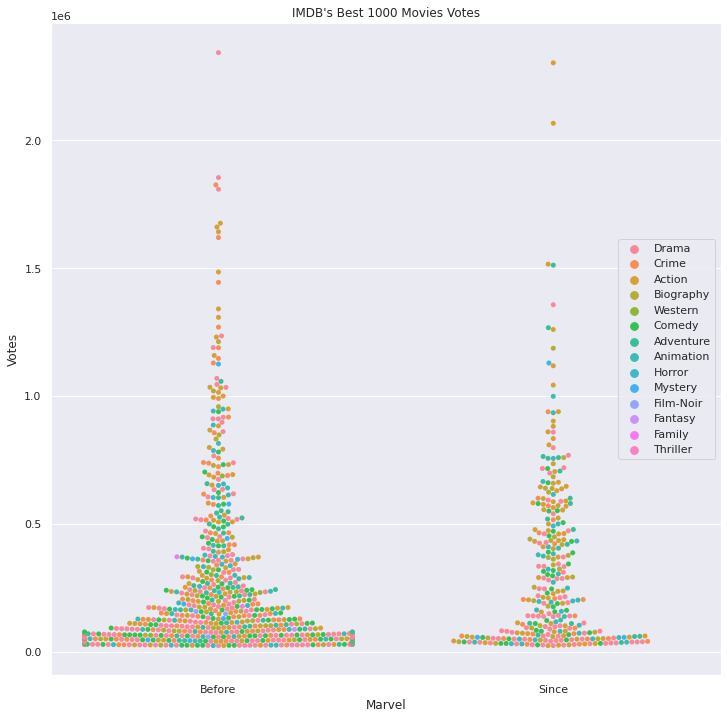

In [21]:
fig, axs = plt.subplots(figsize = (12,12))
p = sns.swarmplot(x = "Marvel", y = "Votes", hue = "Genre", data = movies)
plt.title("IMDB's Best 1000 Movies Votes")
p.legend(bbox_to_anchor = (1, 0.5), loc = 5)
plt.show();

## Analysis By Rating

In [22]:
movies.filter(["Title", "Rating", "Marvel"]).head(10)

,Title,Rating,Marvel
0,The Shawshank Redemption,9.3,Before
1,The Godfather,9.2,Before
2,The Dark Knight,9.0,Since
3,The Godfather: Part II,9.0,Before
4,12 Angry Men,9.0,Before
5,The Lord of the Rings: The Return of the King,8.9,Before
6,Pulp Fiction,8.9,Before
7,Schindler's List,8.9,Before
8,Inception,8.8,Since
9,Fight Club,8.8,Before


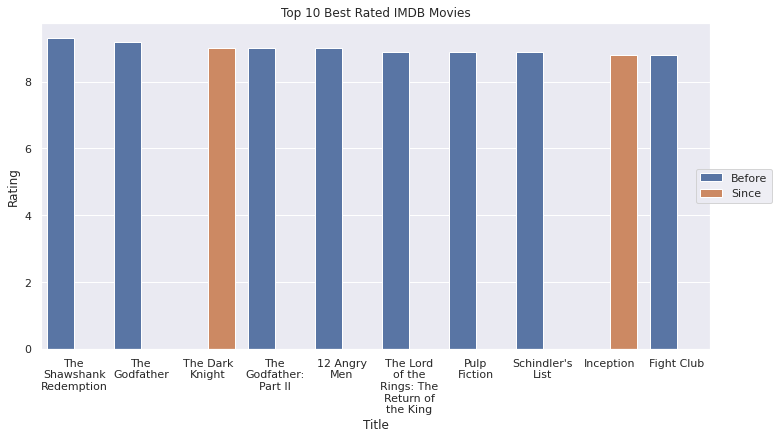

In [23]:
import textwrap
def wrap_labels(ax, width, break_long_words = False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

fig, axs = plt.subplots(figsize = (12, 6))
sns.barplot(x = movies["Title"][:10], y = movies["Rating"][:10], hue = movies["Marvel"])
plt.title("Top 10 Best Rated IMDB Movies")
plt.legend(bbox_to_anchor = (1.1, 0.5), loc = 5)
wrap_labels(axs, 10)
plt.show();

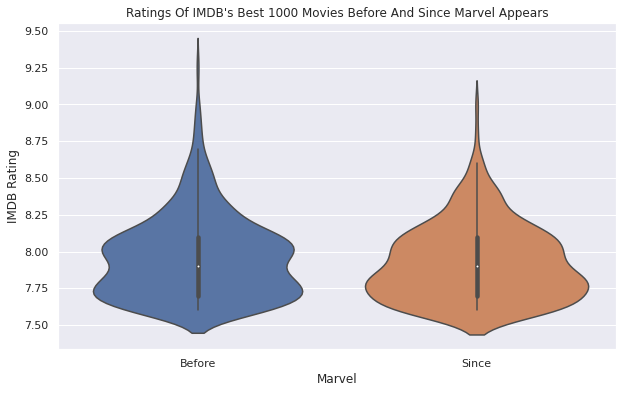

In [24]:
fig, axs = plt.subplots(figsize = (10, 6))
sns.violinplot(x = "Marvel", y = "Rating", data = movies)
plt.title("Ratings Of IMDB's Best 1000 Movies Before And Since Marvel Appears")
plt.ylabel("IMDB Rating")
plt.xlabel("Marvel")
plt.show();

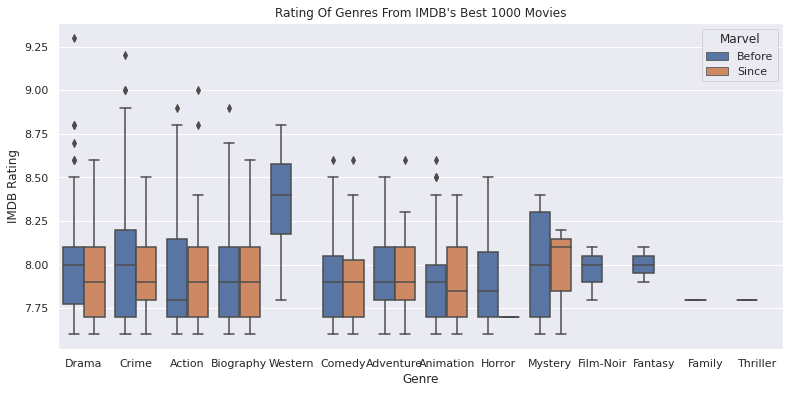

In [25]:
plt.figure(figsize = (13, 6))
ax = sns.boxplot(x = movies["Genre"], y = movies["Rating"], hue = movies["Marvel"])
plt.title("Rating Of Genres From IMDB's Best 1000 Movies")
plt.ylabel("IMDB Rating")
plt.show();

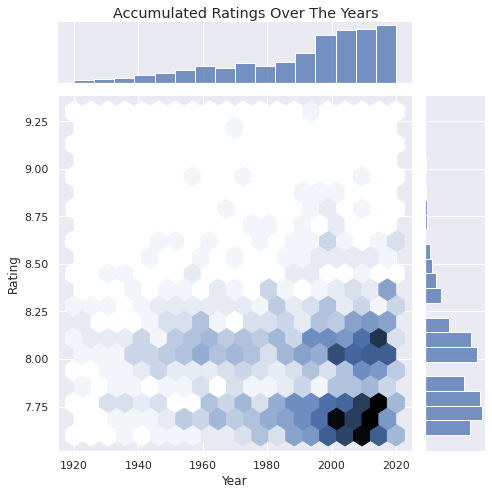

In [26]:
p = sns.jointplot(x = "Year", y = "Rating", data = movies, kind = "hex", height = 7)
p.fig.suptitle("Accumulated Ratings Over The Years")
p.fig.tight_layout()
p.fig.subplots_adjust(top = 0.95)
plt.show();

## Movies Analysis By Gross

In [27]:
movies.sort_values("Gross", ascending = False).filter(["Title", "Gross", "Marvel"]).head(10)

,Title,Gross,Marvel
477,Star Wars: Episode VII - The Force Awakens,936662225,Since
59,Avengers: Endgame,858373000,Since
623,Avatar,760507625,Since
60,Avengers: Infinity War,678815482,Since
652,Titanic,659325379,Before
357,The Avengers,623279547,Since
891,Incredibles 2,608581744,Since
2,The Dark Knight,534858444,Since
582,Rogue One,532177324,Since
63,The Dark Knight Rises,448139099,Since


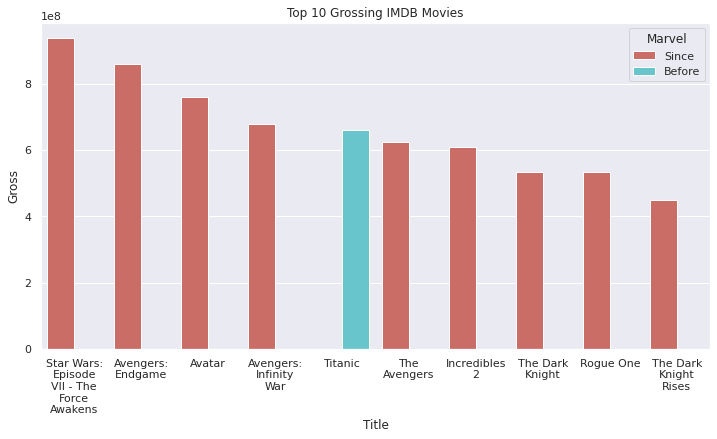

In [28]:
best_gross = movies.sort_values(["Gross"], ascending = False)
fig, axs = plt.subplots(figsize = (12, 6))
sns.barplot(x = best_gross["Title"][:10], y = best_gross["Gross"][:10], hue = best_gross["Marvel"], palette = "hls")
plt.title("Top 10 Grossing IMDB Movies")
wrap_labels(axs, 10)
plt.show();

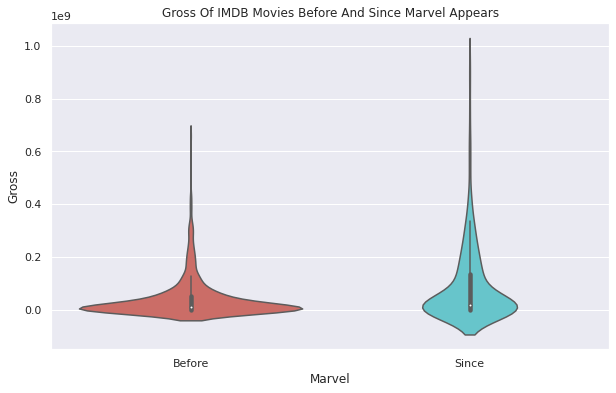

In [29]:
fig, axs = plt.subplots(figsize = (10, 6))
sns.violinplot(x = "Marvel", y = "Gross", data = movies, palette = "hls")
plt.title("Gross Of IMDB Movies Before And Since Marvel Appears")
plt.ylabel("Gross")
plt.xlabel("Marvel")
plt.show();

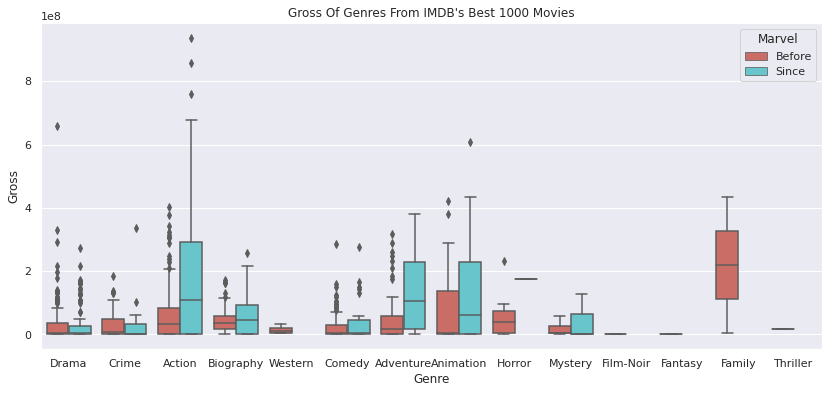

In [30]:
plt.figure(figsize = (14, 6))
ax = sns.boxplot(x = movies["Genre"], y = movies["Gross"], hue = movies["Marvel"], palette = "hls")
plt.title("Gross Of Genres From IMDB's Best 1000 Movies")
plt.ylabel("Gross")
plt.show();

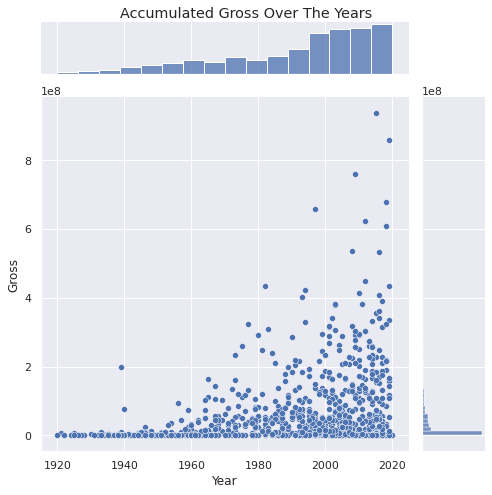

In [31]:
p = sns.jointplot(x = "Year", y = "Gross", data = movies, height = 7)
p.fig.suptitle("Accumulated Gross Over The Years")
p.fig.tight_layout()
p.fig.subplots_adjust(top = 0.95)
plt.show();


## The Marvel Studios dataset and its info

This dataset stores information about the 29 movies produced by Marvel Studios.

The data is classified as it follows:

- movie: title from the movie.
- released_date: date at which the movie was released.
- gross_us_canada: cumulative earnings of the movie in US an Canada, that will be our reference value.
- gross_other_territories: cumulative earnings of the movie in other territories. 
- gross_gross_worldwide: cumulative earnings of the movie worldwide.
- alltime_rank_us_canada = all-time gross rank in US and Canada.
- alltime_rank_worldwide = all-time gross rank worldwide. 
- budget million: budget of the movie in million dolars.
- rottentomatoes: rating from this web.
- metacritic: rating from this metacritic.com that will be our reference value.
- cinemascore: rating from this web.

## Reading data

In [32]:
marvel_movies = pd.read_csv("https://raw.githubusercontent.com/JuanArchidona/practica_pandas/main/marvel_cinematic_universe.csv", sep = ",")

In [33]:
marvel_movies.head(1)

,movie,release_date,gross_us_canada,gross_other_territories,gross_worldwide,alltime_rank_us_canada,alltime_rank_worlwide,budget_million,rottentomatoes,metacritic,cinemascore
0,Iron Man,5/2/2008,"$319,034,126","$266,762,121","$585,796,247",77.0,176.0,140.00,94% (281 reviews)[323],79 (38 reviews)[324],A[325]


In [34]:
marvel_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie                    28 non-null     object 
 1   release_date             28 non-null     object 
 2   gross_us_canada          28 non-null     object 
 3   gross_other_territories  28 non-null     object 
 4   gross_worldwide          28 non-null     object 
 5   alltime_rank_us_canada   28 non-null     float64
 6   alltime_rank_worlwide    28 non-null     float64
 7   budget_million           28 non-null     object 
 8   rottentomatoes           28 non-null     object 
 9   metacritic               28 non-null     object 
 10  cinemascore              28 non-null     object 
dtypes: float64(2), object(9)
memory usage: 2.6+ KB


# Cleaning Data

Let's start with a brief look at the size and information of the dataset.

In [35]:
marvel_movies.shape

(29, 11)

Removing last row with all missing values.

In [36]:
marvel_movies = marvel_movies.dropna(how = "all")

In [37]:
marvel_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie                    28 non-null     object 
 1   release_date             28 non-null     object 
 2   gross_us_canada          28 non-null     object 
 3   gross_other_territories  28 non-null     object 
 4   gross_worldwide          28 non-null     object 
 5   alltime_rank_us_canada   28 non-null     float64
 6   alltime_rank_worlwide    28 non-null     float64
 7   budget_million           28 non-null     object 
 8   rottentomatoes           28 non-null     object 
 9   metacritic               28 non-null     object 
 10  cinemascore              28 non-null     object 
dtypes: float64(2), object(9)
memory usage: 2.6+ KB


We are only going to deal with the columns that provide relevant information for our analysis. Columns with unhelpful data will be removed later.

Now we set the same name for the columns with valuable information. As we made with IMDB's dataset. 

In [38]:
marvel_movies = marvel_movies.rename(columns = {"movie": "Title", "release_date": "Year", "gross_us_canada": "Gross", "metacritic": "Meta_Score"})

Let's extract the release year from the movie.

In [39]:
marvel_movies = marvel_movies.assign(Year = lambda dataset: dataset.Year.apply(lambda text: text.split("/")[2]).astype(int))

We also need to adjust "Gross" values and type.

In [40]:
marvel_movies = marvel_movies.assign(Gross = lambda dataset: dataset.Gross.str.replace(",", "").str[1:12].astype(int))

"Meta_Score" values format will be adjusted.

In [41]:
marvel_movies = marvel_movies.assign(Meta_Score = lambda dataset: dataset.Meta_Score.apply(lambda text: text.split(" ")[0]).astype(int))

Finally we are going to drop some columns that do not provide relevant information to our analysis.

In [42]:
marvel_movies = marvel_movies.drop(columns = {"gross_other_territories", "gross_worldwide", "alltime_rank_us_canada", "alltime_rank_worlwide", "budget_million", "rottentomatoes", "cinemascore"}) 

In [43]:
marvel_movies["War_Side"] = "Marvel"
marvel_movies = marvel_movies \
  .filter(["Title", "Year", "Meta_Score", "Gross", "War_Side"]) 

marvel_movies.head()

,Title,Year,Meta_Score,Gross,War_Side
0,Iron Man,2008,79,319034126,Marvel
1,The Incredible Hulk,2008,61,134806913,Marvel
2,Iron Man 2,2010,57,312433331,Marvel
3,Thor,2011,57,181030624,Marvel
4,Captain America: The First Avenger,2011,66,176654505,Marvel


Let's check the final format of the dataset, parameters and their values.

In [44]:
marvel_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       28 non-null     object
 1   Year        28 non-null     int64 
 2   Meta_Score  28 non-null     int64 
 3   Gross       28 non-null     int64 
 4   War_Side    28 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


## Getting the best Martin Scorsese films from the Movies dataset. 

In [45]:
scorsese_movies = movies.query("Director == 'Martin Scorsese'", engine = "python")  \
  .assign(War_Side = lambda dataset: dataset.Director.str.replace("Martin Scorsese", "Scorsese")) \
  .drop(columns = {"Genre", "Rating", "Director", "Votes", "Marvel"}) \
  
scorsese_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 15 to 836
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       10 non-null     object
 1   Year        10 non-null     int64 
 2   Meta_Score  10 non-null     int64 
 3   Gross       10 non-null     int64 
 4   War_Side    10 non-null     object
dtypes: int64(3), object(2)
memory usage: 480.0+ bytes


## Joining both datasets

In [46]:
movies_war = pd.merge(marvel_movies, scorsese_movies, on = ["Title", "Year", "Meta_Score", "Gross", "War_Side"], how = "outer")
movies_war.sample(5)

,Title,Year,Meta_Score,Gross,War_Side
8,Captain America: The Winter Soldier,2014,70,259766572,Marvel
29,The Departed,2006,85,132384315,Scorsese
7,Thor: The Dark World,2013,54,206362140,Marvel
16,Thor: Ragnarok,2017,74,315058289,Marvel
18,Avengers: Infinity War,2018,68,678815482,Marvel


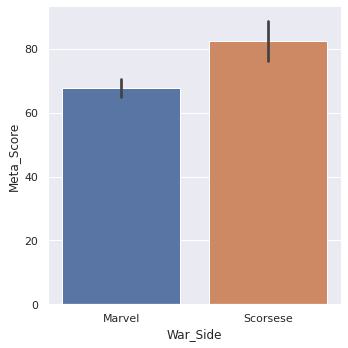

In [47]:
sns.catplot(x = "War_Side", y = "Meta_Score", data = movies_war, kind= "bar");

In [48]:
movies_war.sort_values("Meta_Score", ascending = False).head(10)

,Title,Year,Meta_Score,Gross,War_Side
35,The Irishman,2019,94,7000000,Scorsese
30,Taxi Driver,1976,94,28262574,Scorsese
37,After Hours,1985,90,10600000,Scorsese
28,Goodfellas,1990,90,46836394,Scorsese
34,Raging Bull,1980,89,23383987,Scorsese
17,Black Panther,2018,88,700426566,Marvel
29,The Departed,2006,85,132384315,Scorsese
0,Iron Man,2008,79,319034126,Marvel
21,Avengers: Endgame,2019,78,858373000,Marvel
9,Guardians of the Galaxy,2014,76,333718600,Marvel


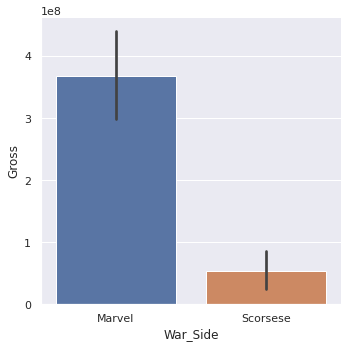

In [49]:
sns.catplot(x = "War_Side", y = "Gross", data = movies_war, kind= "bar");

In [50]:
movies_war.sort_values("Gross", ascending = False).head(10)

,Title,Year,Meta_Score,Gross,War_Side
21,Avengers: Endgame,2019,78,858373000,Marvel
26,Spider-Man: No Way Home,2021,71,804747988,Marvel
17,Black Panther,2018,88,700426566,Marvel
18,Avengers: Infinity War,2018,68,678815482,Marvel
5,Marvel's The Avengers,2012,69,623357910,Marvel
10,Avengers: Age of Ultron,2015,66,459005868,Marvel
20,Captain Marvel,2019,64,426829839,Marvel
6,Iron Man 3,2013,62,409013994,Marvel
12,Captain America: Civil War,2016,75,408084349,Marvel
22,Spider-Man: Far From Home,2019,69,390532085,Marvel


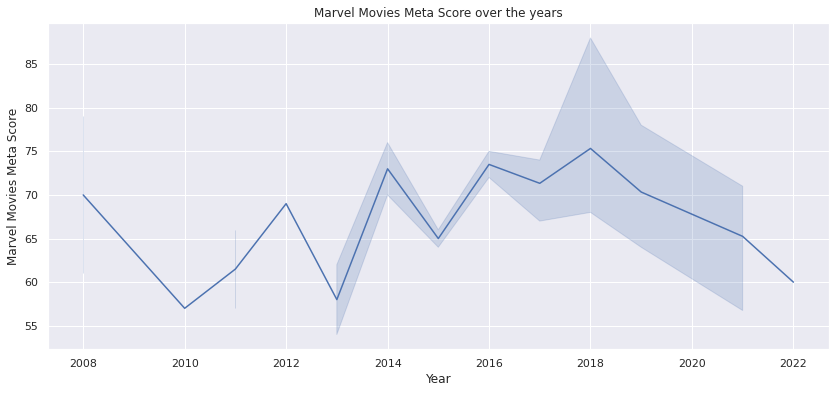

In [51]:
plt.figure(figsize = (14, 6))
AX = sns.lineplot(x = movies_war["Year"], y = movies_war.query("War_Side == 'Marvel'")["Meta_Score"])
plt.title("Marvel Movies Meta Score over the years")
plt.ylabel("Marvel Movies Meta Score")
plt.show();

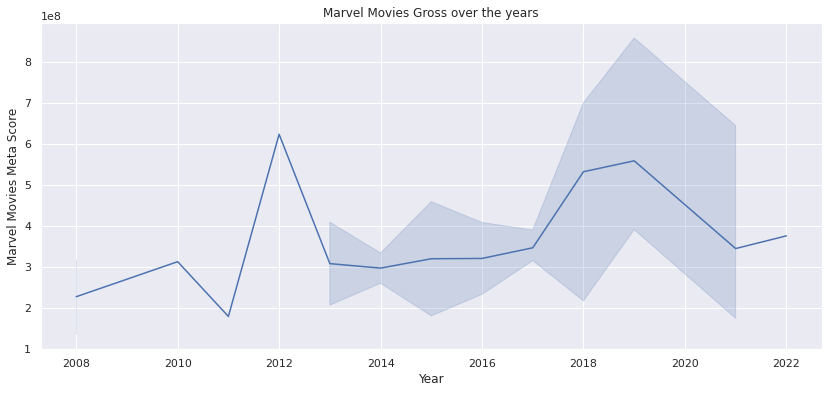

In [52]:
plt.figure(figsize = (14, 6))
AX = sns.lineplot(x = movies_war["Year"], y = movies_war.query("War_Side == 'Marvel'")["Gross"])
plt.title("Marvel Movies Gross over the years")
plt.ylabel("Marvel Movies Meta Score")
plt.show();